In [1]:
import matplotlib.pyplot as plt
import itertools
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
import tensorflow_datasets as tfds
import torchvision
from tensorflow.keras.datasets import cifar10
import os
from torch.autograd import Variable
from torch.utils.data.dataset import Dataset
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [2]:
import g_arches
classes = ('plane', 'car', 'bird', 'cat',
	           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [12]:
v_dim = 100
c_dim = 10


#G = g_arches.rgb_32_G(v_dim)
#model.load_state_dict(torch.load(path))
#G.load_state_dict(torch.load('model_sets/gan_cifar/gan_cifar_0_G.pt'))
#print(model)

In [13]:
def get_codes(size, hardware = 'cpu', hot = True):
    if hot == True:
        return one_hot_embedding(torch.randint(c_dim, size = (size, 1), device = hardware))

    else:
        return torch.randint(c_dim, size = (size, 1), device = hardware)

def one_hot_embedding(labels):
    #y = torch.eye(num_classes)
    #return y[labels]
    #return torch.nn.functional.one_hot(labels)[:,1:]

    labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)
    return torch.squeeze(labels)

<ipython-input-13-1c41a6154251>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


torch.Size([60, 10, 1, 1])
torch.Size([60, 10, 1, 1])


In [15]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True)

#cifar_subset_num = 2000
#print(trainset.data.shape)
#print(len(trainset.targets))
classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
#xtrain = trainset.data[0:cifar_subset_num, :, :, :]
#ytrain = trainset.targets[0:cifar_subset_num]

#print(ytrain[0:30])

#with torch.no_grad():
#    ind_list = [30, 4, 6, 9, 3, 27, 0, 7, 8, 1]
#    for i in range(9):
#        plt.subplot(330 + 1 + i).set_title(str(classes[i]))
#        # plot raw pixel data
#        ind = ind_list[i]
#        element = xtrain[ind,:,:]
#        #print(element.shape)
#        plt.imshow(element)
#    plt.show()

Files already downloaded and verified


<ipython-input-13-1c41a6154251>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


torch.Size([60, 10, 1, 1])
torch.Size([60, 10, 1, 1])
torch.Size([60, 3, 32, 32])
torch.Size([3, 206, 342])
torch.Size([60, 10, 1, 1])
torch.Size([60, 10, 1, 1])
torch.Size([60, 3, 32, 32])
torch.Size([3, 206, 342])
torch.Size([60, 10, 1, 1])
torch.Size([60, 10, 1, 1])
torch.Size([60, 3, 32, 32])
torch.Size([3, 206, 342])
torch.Size([60, 10, 1, 1])
torch.Size([60, 10, 1, 1])
torch.Size([60, 3, 32, 32])
torch.Size([3, 206, 342])
torch.Size([60, 10, 1, 1])
torch.Size([60, 10, 1, 1])
torch.Size([60, 3, 32, 32])
torch.Size([3, 206, 342])
torch.Size([60, 10, 1, 1])
torch.Size([60, 10, 1, 1])
torch.Size([60, 3, 32, 32])
torch.Size([3, 206, 342])
torch.Size([60, 10, 1, 1])
torch.Size([60, 10, 1, 1])
torch.Size([60, 3, 32, 32])
torch.Size([3, 206, 342])
torch.Size([60, 10, 1, 1])
torch.Size([60, 10, 1, 1])
torch.Size([60, 3, 32, 32])
torch.Size([3, 206, 342])
torch.Size([60, 10, 1, 1])
torch.Size([60, 10, 1, 1])
torch.Size([60, 3, 32, 32])
torch.Size([3, 206, 342])
torch.Size([60, 10, 1, 1])
t

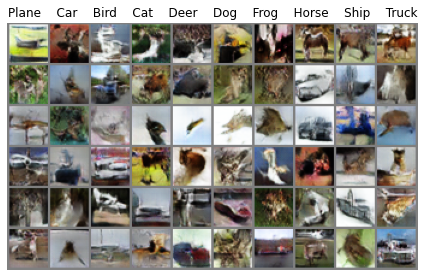

In [40]:
for i in range(10):
    path = f'model_sets/gan_cifar/gan_cifar_{i}_G.pt'
    model = g_arches.rgb_32_G(v_dim)
    model.load_state_dict(torch.load(path))

    mini_batch = 60

    rand_v = torch.randn((mini_batch, v_dim, 1, 1))
    rand_c = get_codes(mini_batch).view(mini_batch, c_dim, 1, 1).float()
    print(rand_c.shape)
    c = [list(range(10)) for x in range(mini_batch // 10)]
    #print(c)
    c_hot = one_hot_embedding(c)
    #print(c_hot)
    c_hot = c_hot.view(mini_batch, 10, 1, 1).float()
    print(c_hot.shape)

    with torch.no_grad():
        #outputs = model(rand_v, c_hot)
        outputs = model(rand_v)
        #g_outputs = G(rand_v)

    #batch_tensor = torch.randn(*(40, 3, 256, 256))   # (N, C, H, W)
    #batch_tensor = outputs
    batch_tensor = outputs
    print(batch_tensor.shape)
    grid_img = torchvision.utils.make_grid(batch_tensor, nrow=10)
    print(grid_img.shape)
    plt.imshow(0.5*grid_img.permute(1, 2, 0) + 0.5)
    plt.title('Plane    Car    Bird    Cat    Deer    Dog    Frog    Horse    Ship    Truck')
    plt.axis('off')
    plt.tight_layout()
    #plt.show()
    plt.savefig(f'writing/imgs/grids/gan_{i}.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


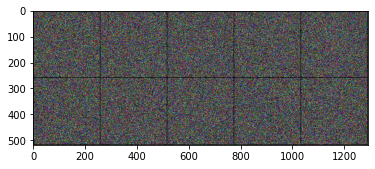

In [7]:
plt.imshow(grid_img.permute(1, 2, 0))

In [146]:
print(outputs.shape)
from sklearn.decomposition import PCA
model = model.cpu()
mini_batch = 10000

rand_v = torch.randn((mini_batch, v_dim, 1, 1), device = 'cpu')#.to(device)
rand_c = get_codes(mini_batch).view(mini_batch, c_dim, 1, 1).float()#.to(device)
#print(rand_c.shape)
#c = [list(range(10)) for x in range(mini_batch // 10)]
#print(c)
#c_hot = one_hot_embedding(c)
#print(c_hot)
#c_hot = c_hot.view(mini_batch, 10, 1, 1).float()
#print(c_hot.shape)
with torch.no_grad():
    outputs = model(rand_v, c_hot)
    #g_outputs = G(rand_v)


torch.Size([10000, 3, 32, 32])


<ipython-input-93-1c41a6154251>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


KeyboardInterrupt: 

In [129]:
pca = PCA().fit(outputs.view(outputs.shape[0], -1))

In [130]:
cumsums = np.cumsum(pca.explained_variance_ratio_)

In [131]:
res = next(x for x, val in enumerate(cumsums) 
                                  if val > 0.95)
print ("The index of element just greater than 0.95 : "
                                           + str(res)) 

The index of element just greater than 0.95 : 175


In [111]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
	                                       download=True)

Files already downloaded and verified


In [116]:
data = testset.data

In [117]:
print(data.shape)

(10000, 32, 32, 3)


In [126]:
data = torch.Tensor(data).reshape(10000, -1)
pca = PCA().fit(data)
cumsums = np.cumsum(pca.explained_variance_ratio_)


In [127]:
res = next(x for x, val in enumerate(cumsums) 
                                  if val > 0.95)
print ("The index of element just greater than 0.95 : "
                                           + str(res)) 

The index of element just greater than 0.95 : 210


In [2]:
import g_arches
classes = ('plane', 'car', 'bird', 'cat',
	           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


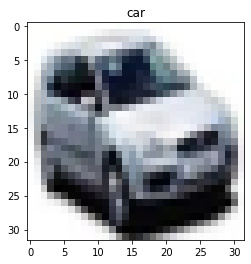

In [12]:
v_dim = 100
c_dim = 10

#path = 'model_sets/cae_gan_snap_cifar/caegan_cifar_0_softmax_SNAP_G.pt'
#model = g_arches.rgb_32_C_AE(v_dim, c_dim)
#G = g_arches.rgb_32_G(v_dim)
#model.load_state_dict(torch.load(path))
#G.load_state_dict(torch.load('model_sets/gan_cifar/gan_cifar_0_G.pt'))
#print(model)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True)

cifar_subset_num = 2000
#print(trainset.data.shape)
#print(len(trainset.targets))
classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
xtrain = trainset.data[0:cifar_subset_num, :, :, :]
ytrain = trainset.targets[0:cifar_subset_num]
#print(xtrain.shape)
xtrain = (torch.from_numpy(xtrain).float() / 255)*2 - 1
xtrain = xtrain.permute(0,3,1,2)

#print(torch.min(xtrain), torch.max(xtrain))
#print(xtrain.shape)

rand_ind = np.random.randint(cifar_subset_num)
plt.imshow(0.5*xtrain[rand_ind].permute(1,2,0) + .5)
plt.title(classes[ytrain[rand_ind]])
plt.show()



cuda
model_sets/c_gan_cifar/c_gan_cifar_0_G.pt


TypeError: load_state_dict() missing 1 required positional argument: 'state_dict'

In [ ]:
from sklearn.decomposition import PCA
import torch
import g_arches
import os
import numpy as np

torch.cuda.empty_cache()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
def get_codes(size, hardware = device, hot = True):
    if hot == True:
        return one_hot_embedding(torch.randint(c_dim, size = (size, 1), device = hardware)).float()

    else:
        return torch.randint(c_dim, size = (size, 1), device = hardware)

def one_hot_embedding(labels, hot = True):
    #y = torch.eye(num_classes)
    #return y[labels]
    #return torch.nn.functional.one_hot(labels)[:,1:]

    labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)
    if hot == True:
        return torch.squeeze(labels).to(device)
    else:
        return torch.squeeze(labels).to(device)



v_dim = 100
c_dim = 10
cifar_subset_num = 1000
directory = 'model_sets/gan_cifar/'
reses = []
#G = g_arches.rgb_32_C_G(v_dim, c_dim)
G = g_arches.rgb_32_G(v_dim)
with torch.no_grad():
    for experiment in range(8):
        for filename in os.listdir(directory):
            print(directory+filename)
            G.load_state_dict(torch.load(directory+filename))
            G = G.eval()
            G = G.to(device)
            v = torch.randn((cifar_subset_num, v_dim, 1, 1), device = device)
            codes = get_codes(cifar_subset_num).view(cifar_subset_num, c_dim, 1, 1)

            #outputs = G(v, codes).view(cifar_subset_num, -1).cpu()
            outputs = G(v).view(cifar_subset_num, -1).cpu()
            pca_mod = PCA().fit(outputs)

            cumsums = np.cumsum(pca_mod.explained_variance_ratio_)
            res = next(x for x, val in enumerate(cumsums) 
                                          if val > 0.95)
            print ("The index of element just greater than 0.95 : "
                                                   + str(res))
            reses.append(res)
            
import winsound
duration = 1000  # milliseconds
freq = 330  # Hz
winsound.Beep(freq, duration)

cuda
model_sets/gan_cifar/gan_cifar_0_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 134
model_sets/gan_cifar/gan_cifar_1_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 137
model_sets/gan_cifar/gan_cifar_2_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 146
model_sets/gan_cifar/gan_cifar_3_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 159
model_sets/gan_cifar/gan_cifar_4_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 149
model_sets/gan_cifar/gan_cifar_5_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 149
model_sets/gan_cifar/gan_cifar_6_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 149
model_sets/gan_cifar/gan_cifar_7_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 146
model_sets/gan_cifar/gan_cifar_8_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 150
model_sets/gan_cifar/gan_cifar_9_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 136
model_sets/gan_cifar/gan_cifar_0_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 135
model_sets/gan_cifar/gan_cifar_1_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 135
model_sets/gan_cifar/gan_cifar_2_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 144
model_sets/gan_cifar/gan_cifar_3_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 160
model_sets/gan_cifar/gan_cifar_4_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 146
model_sets/gan_cifar/gan_cifar_5_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 144
model_sets/gan_cifar/gan_cifar_6_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 152
model_sets/gan_cifar/gan_cifar_7_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 144
model_sets/gan_cifar/gan_cifar_8_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 147
model_sets/gan_cifar/gan_cifar_9_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 133
model_sets/gan_cifar/gan_cifar_0_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 138
model_sets/gan_cifar/gan_cifar_1_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 134
model_sets/gan_cifar/gan_cifar_2_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 140
model_sets/gan_cifar/gan_cifar_3_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 161
model_sets/gan_cifar/gan_cifar_4_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 148
model_sets/gan_cifar/gan_cifar_5_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 145
model_sets/gan_cifar/gan_cifar_6_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 148
model_sets/gan_cifar/gan_cifar_7_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 144
model_sets/gan_cifar/gan_cifar_8_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 144
model_sets/gan_cifar/gan_cifar_9_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 133
model_sets/gan_cifar/gan_cifar_0_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 130
model_sets/gan_cifar/gan_cifar_1_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 135
model_sets/gan_cifar/gan_cifar_2_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 140
model_sets/gan_cifar/gan_cifar_3_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 160
model_sets/gan_cifar/gan_cifar_4_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 151
model_sets/gan_cifar/gan_cifar_5_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 152
model_sets/gan_cifar/gan_cifar_6_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 150
model_sets/gan_cifar/gan_cifar_7_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 139
model_sets/gan_cifar/gan_cifar_8_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 147
model_sets/gan_cifar/gan_cifar_9_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 131
model_sets/gan_cifar/gan_cifar_0_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 134
model_sets/gan_cifar/gan_cifar_1_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 137
model_sets/gan_cifar/gan_cifar_2_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 144
model_sets/gan_cifar/gan_cifar_3_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 156
model_sets/gan_cifar/gan_cifar_4_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 149
model_sets/gan_cifar/gan_cifar_5_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 150
model_sets/gan_cifar/gan_cifar_6_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 150
model_sets/gan_cifar/gan_cifar_7_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 145
model_sets/gan_cifar/gan_cifar_8_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 144
model_sets/gan_cifar/gan_cifar_9_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 139
model_sets/gan_cifar/gan_cifar_0_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 136
model_sets/gan_cifar/gan_cifar_1_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 134
model_sets/gan_cifar/gan_cifar_2_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 143
model_sets/gan_cifar/gan_cifar_3_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 162
model_sets/gan_cifar/gan_cifar_4_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 146
model_sets/gan_cifar/gan_cifar_5_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 147
model_sets/gan_cifar/gan_cifar_6_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 153
model_sets/gan_cifar/gan_cifar_7_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 145
model_sets/gan_cifar/gan_cifar_8_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 148
model_sets/gan_cifar/gan_cifar_9_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 139
model_sets/gan_cifar/gan_cifar_0_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


The index of element just greater than 0.95 : 135
model_sets/gan_cifar/gan_cifar_1_G.pt


<ipython-input-2-c6034a287e67>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)


In [ ]:
import statistics
res_mean = sum(reses) / len(reses)
res_var = sum((x-res_mean)**2 for x in reses) / len(reses)
res_stdev = res_var**0.5
res_se = res_stdev / len(reses)
print('res mean and se', res_mean, '+-', res_se)

